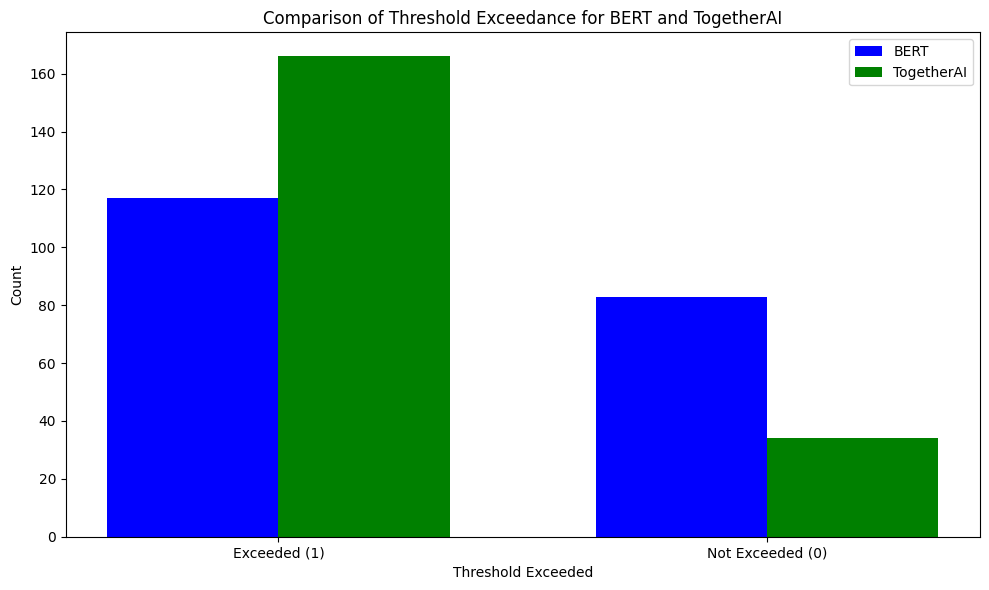

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/keywords_with_cosine_similarity.csv')

# count the number of 1s and 0s in each threshold column
bert_exceeded = df['Bert_Threshold_Exceeded'].value_counts()
together_exceeded = df['Together_Threshold_Exceeded'].value_counts()

# prepare the data for plotting
labels = ['Exceeded (1)', 'Not Exceeded (0)']
bert_counts = [bert_exceeded.get(1, 0), bert_exceeded.get(0, 0)]
together_counts = [together_exceeded.get(1, 0), together_exceeded.get(0, 0)]

# plotting the bar graph with 4 bars
fig, ax = plt.subplots(figsize=(10, 6))

# plot the bars for bert and togetherai
bar_width = 0.35  # width of each bar
index = range(2)  # positions of the bars

# bert bars (exceeded and not exceeded)
ax.bar([i - bar_width/2 for i in index], bert_counts, width=bar_width, label='BERT', color='blue')

# togetherai bars (exceeded and not exceeded)
ax.bar([i + bar_width/2 for i in index], together_counts, width=bar_width, label='TogetherAI', color='green')

# set labels and title
ax.set_xlabel('Threshold Exceeded')
ax.set_ylabel('Count')
ax.set_title('Comparison of Threshold Exceedance for BERT and TogetherAI')

# set the x-axis labels
ax.set_xticks(index)
ax.set_xticklabels(labels)

# add legend
ax.legend()

# show the plot
plt.tight_layout()
plt.show()

In [ ]:
print("BERT Threshold Exceedance:")
print(df['Bert_Threshold_Exceeded'].value_counts())

print("\nTogetherAI Threshold Exceedance:")
print(df['Together_Threshold_Exceeded'].value_counts())

BERT Threshold Exceedance:
Bert_Threshold_Exceeded
1    117
0     83
Name: count, dtype: int64

TogetherAI Threshold Exceedance:
Together_Threshold_Exceeded
1    166
0     34
Name: count, dtype: int64


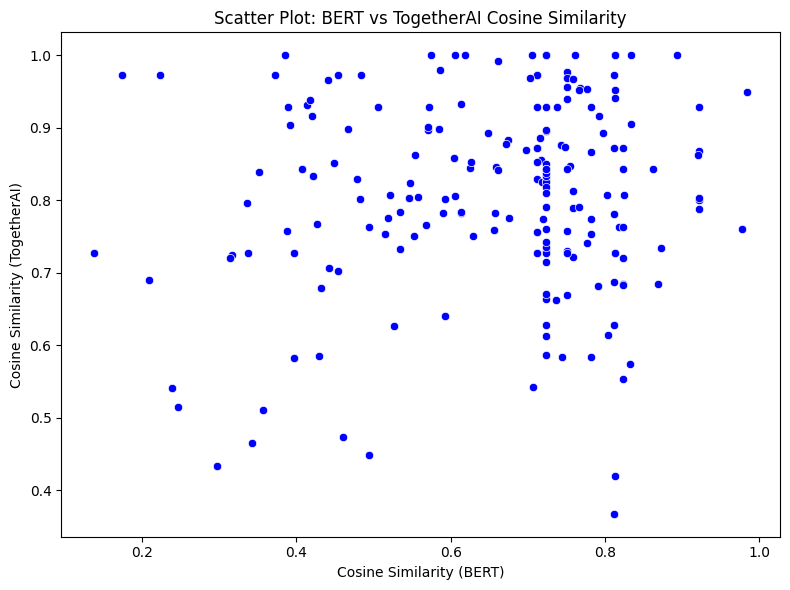

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/keywords_with_cosine_similarity.csv')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='cosine_bw_human_bert', y='cosine_bw_human_together', data=df, color='blue')

plt.xlabel('Cosine Similarity (BERT)')
plt.ylabel('Cosine Similarity (TogetherAI)')
plt.title('Scatter Plot: BERT vs TogetherAI Cosine Similarity')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('/content/keywords_with_cosine_similarity.csv')

bert_mean = df['cosine_bw_human_bert'].mean()
bert_median = df['cosine_bw_human_bert'].median()
togetherai_mean = df['cosine_bw_human_together'].mean()
togetherai_median = df['cosine_bw_human_together'].median()

bert_exceeded_count = df['Bert_Threshold_Exceeded'].sum()
togetherai_exceeded_count = df['Together_Threshold_Exceeded'].sum()

bert_exceeded_proportion = bert_exceeded_count / len(df)
togetherai_exceeded_proportion = togetherai_exceeded_count / len(df)

correlation = df['cosine_bw_human_bert'].corr(df['cosine_bw_human_together'])

bert_std = df['cosine_bw_human_bert'].std()
togetherai_std = df['cosine_bw_human_together'].std()

print("Statistics Summary:")
print(f"BERT - Mean Cosine Similarity: {bert_mean:.4f}")
print(f"BERT - Median Cosine Similarity: {bert_median:.4f}")
print(f"ToghetherAI - Mean Cosine Similarity: {togetherai_mean:.4f}")
print(f"ToghetherAI - Median Cosine Similarity: {togetherai_median:.4f}")
print()
print(f"BERT - Count of Threshold Exceedance (1's): {bert_exceeded_count}")
print(f"ToghetherAI - Count of Threshold Exceedance (1's): {togetherai_exceeded_count}")
print()
print(f"BERT - Proportion of Threshold Exceedance: {bert_exceeded_proportion:.2f}")
print(f"ToghetherAI - Proportion of Threshold Exceedance: {togetherai_exceeded_proportion:.2f}")
print()
print(f"Correlation between BERT and TogetherAI Cosine Similarity: {correlation:.4f}")
print()
print(f"BERT - Standard Deviation of Cosine Similarity: {bert_std:.4f}")
print(f"ToghetherAI - Standard Deviation of Cosine Similarity: {togetherai_std:.4f}")

Statistics Summary:
BERT - Mean Cosine Similarity: 0.6559
BERT - Median Cosine Similarity: 0.7216
ToghetherAI - Mean Cosine Similarity: 0.8093
ToghetherAI - Median Cosine Similarity: 0.8247

BERT - Count of Threshold Exceedance (1's): 117
ToghetherAI - Count of Threshold Exceedance (1's): 166

BERT - Proportion of Threshold Exceedance: 0.58
ToghetherAI - Proportion of Threshold Exceedance: 0.83

Correlation between BERT and TogetherAI Cosine Similarity: 0.1238

BERT - Standard Deviation of Cosine Similarity: 0.1709
ToghetherAI - Standard Deviation of Cosine Similarity: 0.1342


In [ ]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

df = pd.read_csv('/content/keywords_with_cosine_similarity.csv')

# create the groundtruth column with all values as 1
df['GroundTruth'] = 1

# calculate the number of agreements and disagreements for bert and groundtruth
bert_agreements = (df['Bert_Threshold_Exceeded'] == df['GroundTruth']).sum()
bert_disagreements = (df['Bert_Threshold_Exceeded'] != df['GroundTruth']).sum()

# calculate the number of agreements and disagreements for togetherai and groundtruth
together_agreements = (df['Together_Threshold_Exceeded'] == df['GroundTruth']).sum()
together_disagreements = (df['Together_Threshold_Exceeded'] != df['GroundTruth']).sum()

print(f"Bert_Threshold_Exceeded vs GroundTruth:")
print(f" - agreements: {bert_agreements}")
print(f" - disagreements: {bert_disagreements}")

print(f"\nTogether_Threshold_Exceeded vs GroundTruth:")
print(f" - agreements: {together_agreements}")
print(f" - disagreements: {together_disagreements}")

# calculate cohen's kappa
total_samples = len(df)

# calculate observed agreement (po)
observed_agreement_bert = bert_agreements / total_samples
observed_agreement_together = together_agreements / total_samples

# calculate expected agreement (pe) assuming random assignment
expected_agreement_bert = (bert_agreements + bert_disagreements) / (2 * total_samples)
expected_agreement_together = (together_agreements + together_disagreements) / (2 * total_samples)

# cohen's kappa formula: (po - pe) / (1 - pe)
kappa_bert = (observed_agreement_bert - expected_agreement_bert) / (1 - expected_agreement_bert)
kappa_together = (observed_agreement_together - expected_agreement_together) / (1 - expected_agreement_together)

print(f"\nCohen's Kappa for BERT and GroundTruth: {kappa_bert}")
print(f"Cohen's Kappa for TogetherAI and GroundTruth: {kappa_together}")

Bert_Threshold_Exceeded vs GroundTruth:
 - agreements: 117
 - disagreements: 83

Together_Threshold_Exceeded vs GroundTruth:
 - agreements: 166
 - disagreements: 34

Cohen's Kappa for BERT and GroundTruth: 0.16999999999999993
Cohen's Kappa for TogetherAI and GroundTruth: 0.6599999999999999


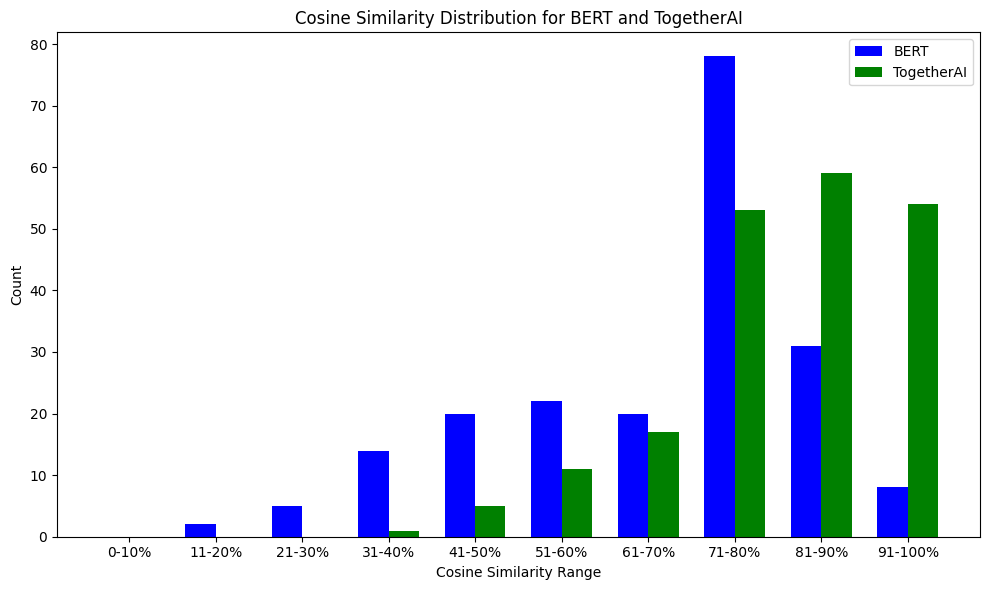

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the file
df = pd.read_csv('/content/keywords_with_cosine_similarity.csv')

# Create bins for the cosine similarity values (0-10%, 11-20%, ..., 91-100%)
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Bin the cosine similarity values for BERT and TogetherAI
df['Bert_Binned'] = pd.cut(df['cosine_bw_human_bert'], bins=bins, labels=['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%'])
df['Together_Binned'] = pd.cut(df['cosine_bw_human_together'], bins=bins, labels=['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%'])

# Count the values in each bin for both columns
bert_counts = df['Bert_Binned'].value_counts().sort_index()
together_counts = df['Together_Binned'].value_counts().sort_index()

# Plotting the bar graph with 2 bars for each range (BERT and TogetherAI)
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35
index = range(len(bins)-1)

# Plot the bars for BERT and TogetherAI
ax.bar([i - bar_width/2 for i in index], bert_counts, width=bar_width, label='BERT', color='blue')
ax.bar([i + bar_width/2 for i in index], together_counts, width=bar_width, label='TogetherAI', color='green')

# Set labels and title
ax.set_xlabel('Cosine Similarity Range')
ax.set_ylabel('Count')
ax.set_title('Cosine Similarity Distribution for BERT and TogetherAI')

# Set the x-axis labels
ax.set_xticks(index)
ax.set_xticklabels(bert_counts.index)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()